<a href="https://colab.research.google.com/github/vjuge/oc-iml/blob/vjuge%2Fissue13/modules/P7/module_P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install scalecast

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20,10)})

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

[*********************100%***********************]  1 of 1 completed


'D'

In [4]:
!pip install yfinance
!pip install scalecast

(621,)

<AxesSubplot:xlabel='Date'>

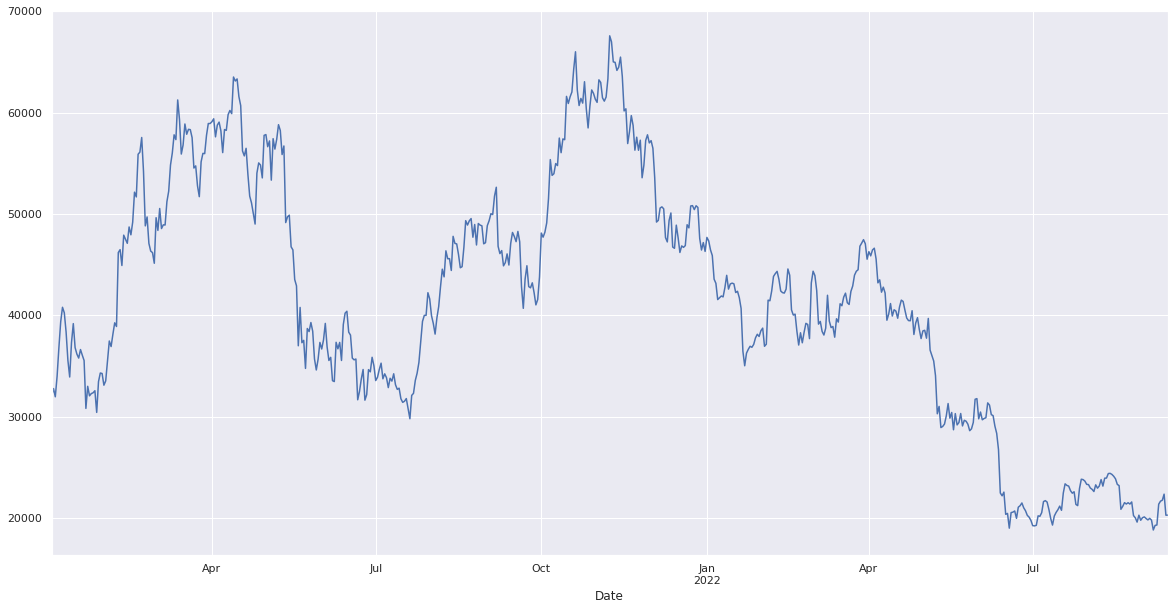

In [5]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import datetime
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(30,10)})

import sys
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
df_btc_usd = yf.download("BTC-USD")
df_btc_usd.shape
df_btc_usd.dtypes
df_btc_usd.columns
df_btc_usd.head()
df_btc_usd.index

df_btc_usd = df_btc_usd.asfreq('d')
pd.infer_freq(df_btc_usd.asfreq('d').index)


In [7]:
# keep only CLose column
df_btc_usd = df_btc_usd['Close']
df_btc_usd = df_btc_usd[df_btc_usd.index > '2021-01-01']
df_btc_usd.shape


Forecaster(
    DateStartActuals=2021-01-02T00:00:00.000000000
    DateEndActuals=2022-09-14T00:00:00.000000000
    Freq=D
    N_actuals=621
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

### Naive Approach

In [15]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

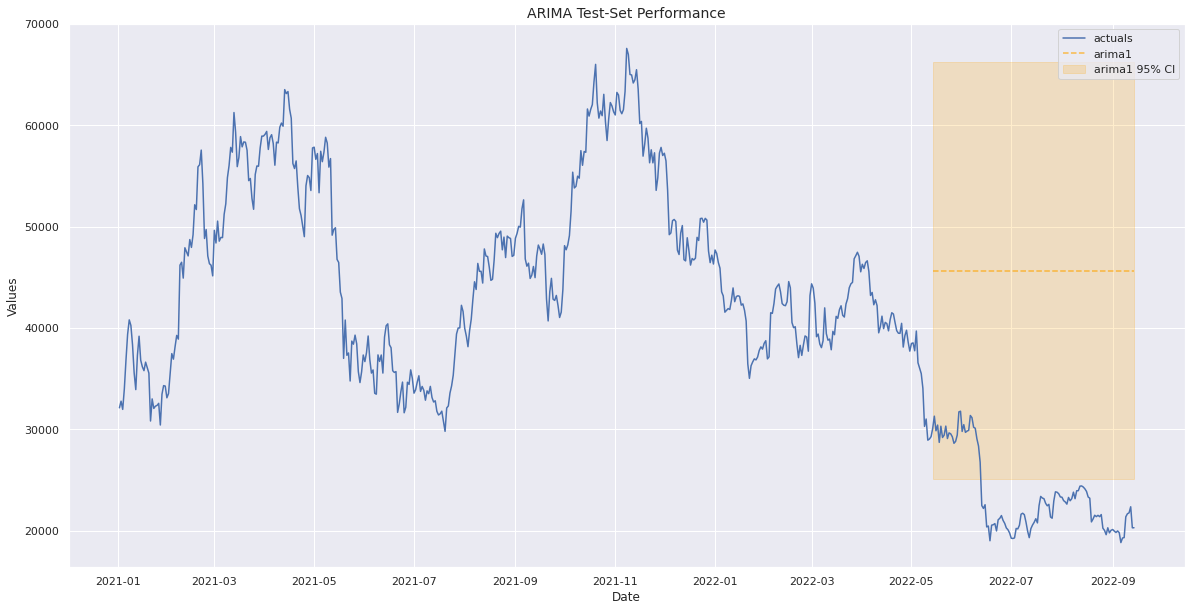

In [16]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

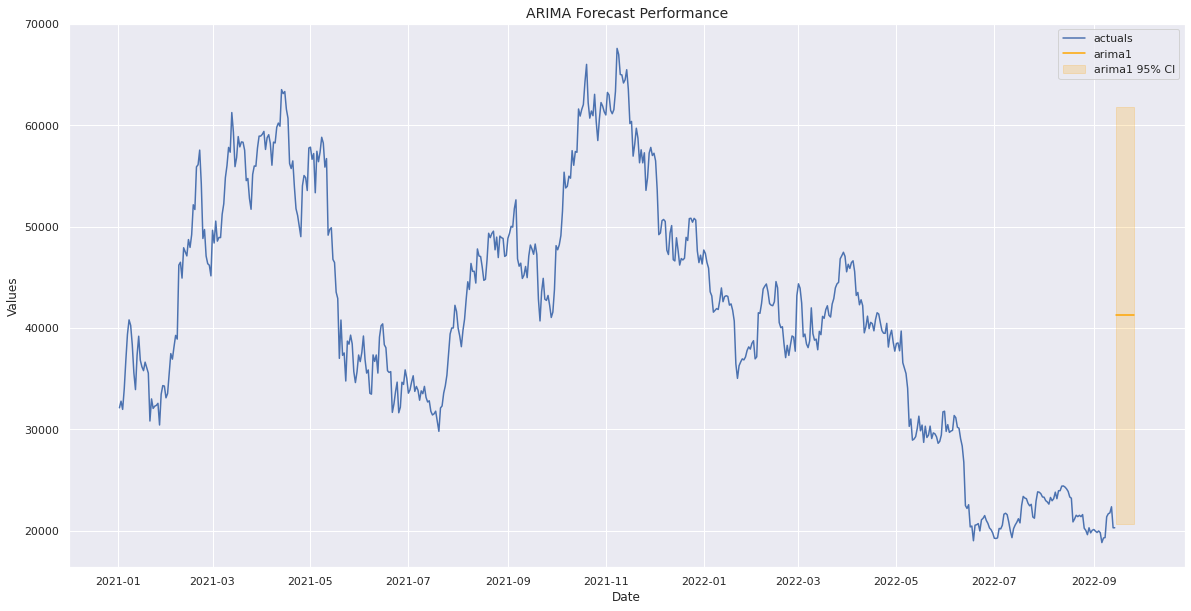

In [17]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

### Human Interpretation - Iterative Approach

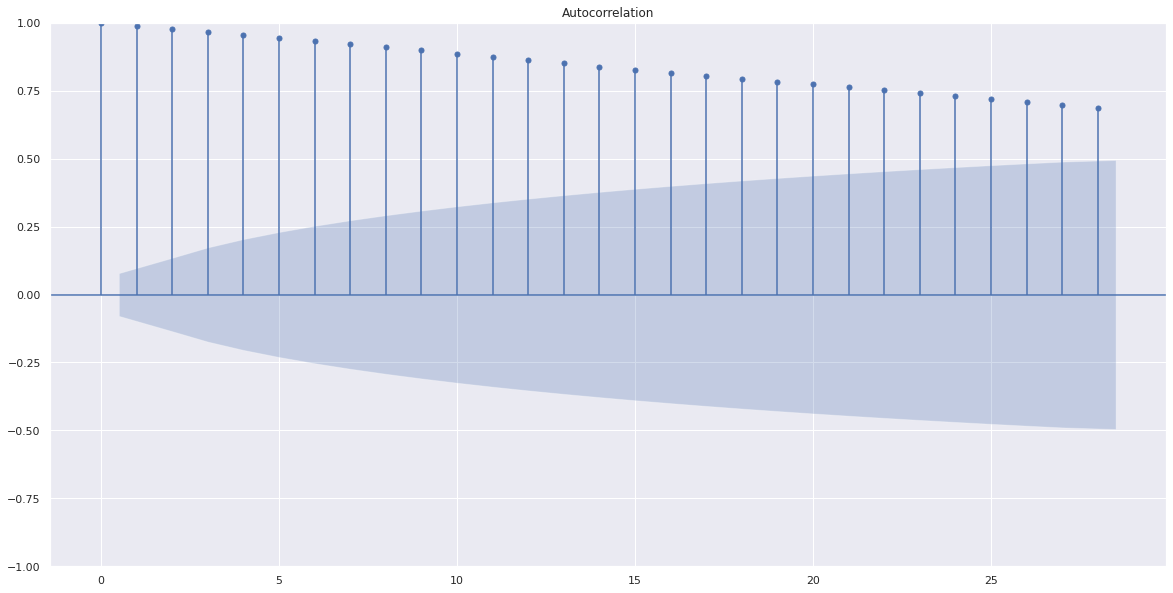

In [18]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

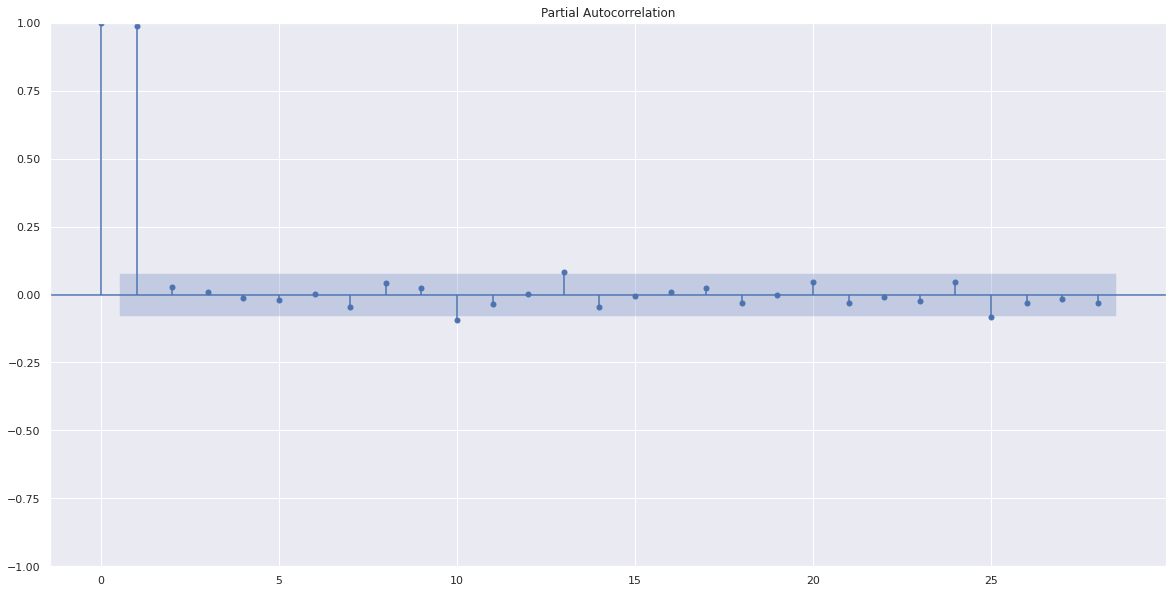

In [19]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

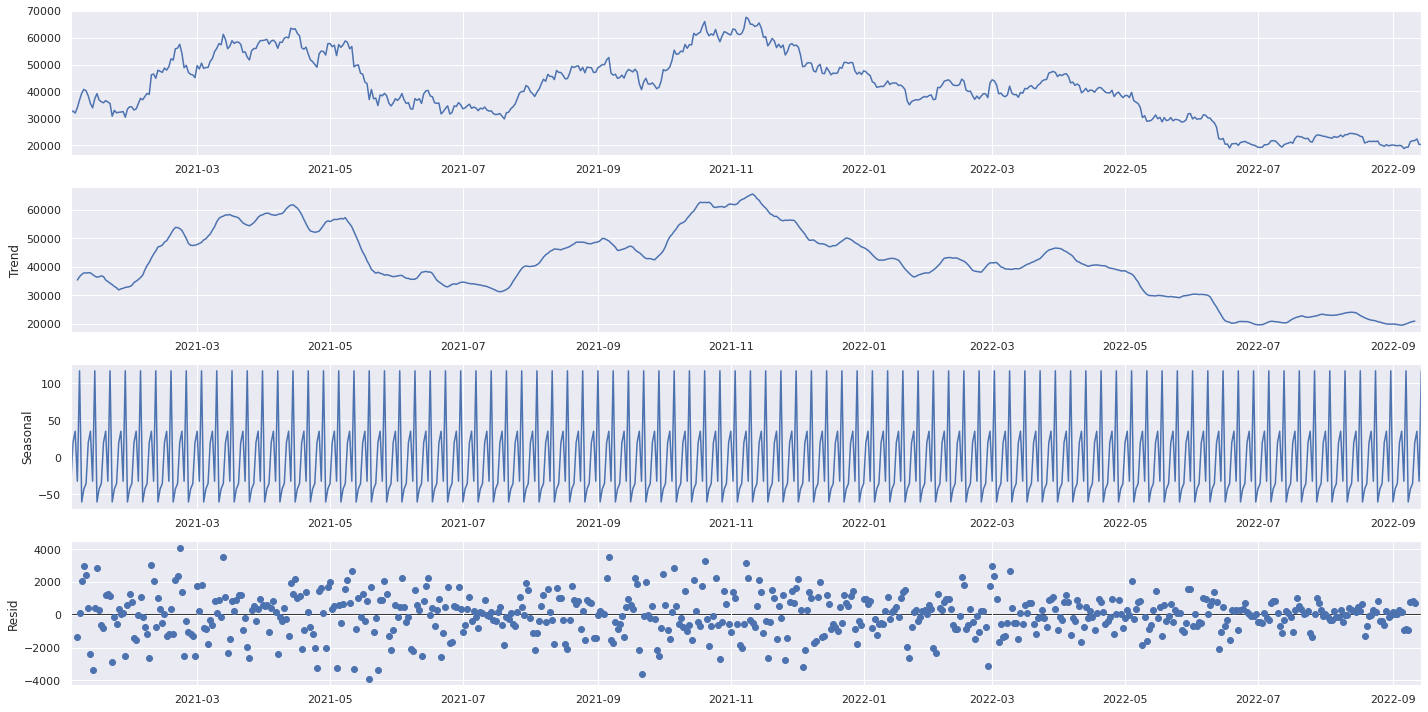

In [20]:
f.seasonal_decompose().plot()
plt.show()

In [21]:
f.plot_acf()
plt.show()

-1.326129383580293
0.6171349398442759


In [24]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


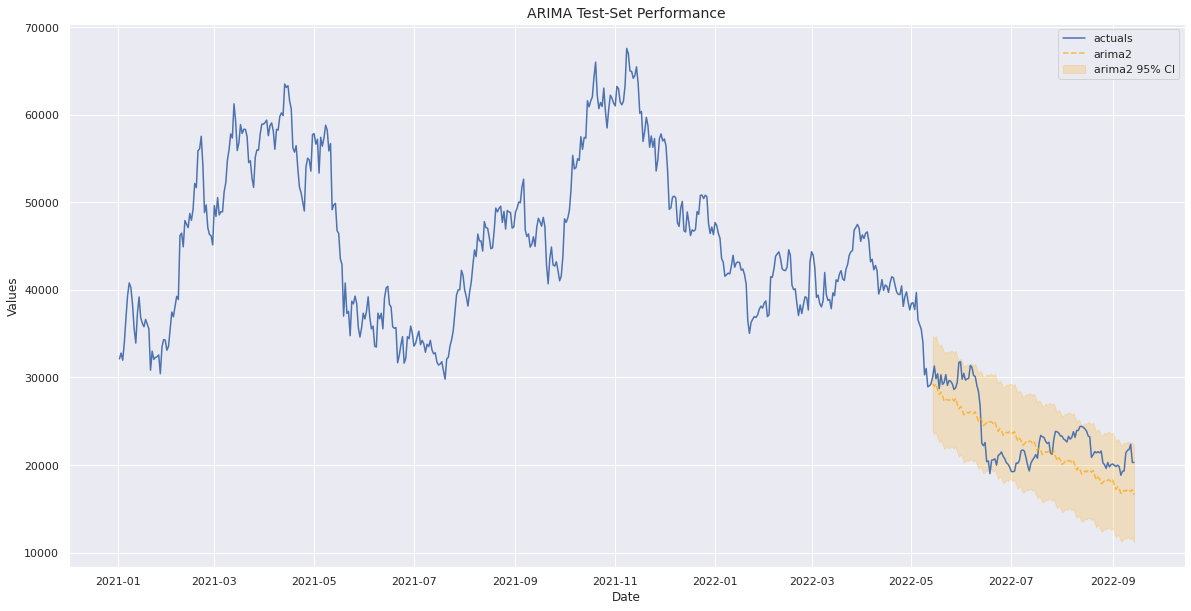

In [25]:
f.seasonal_decompose().plot()
plt.show()

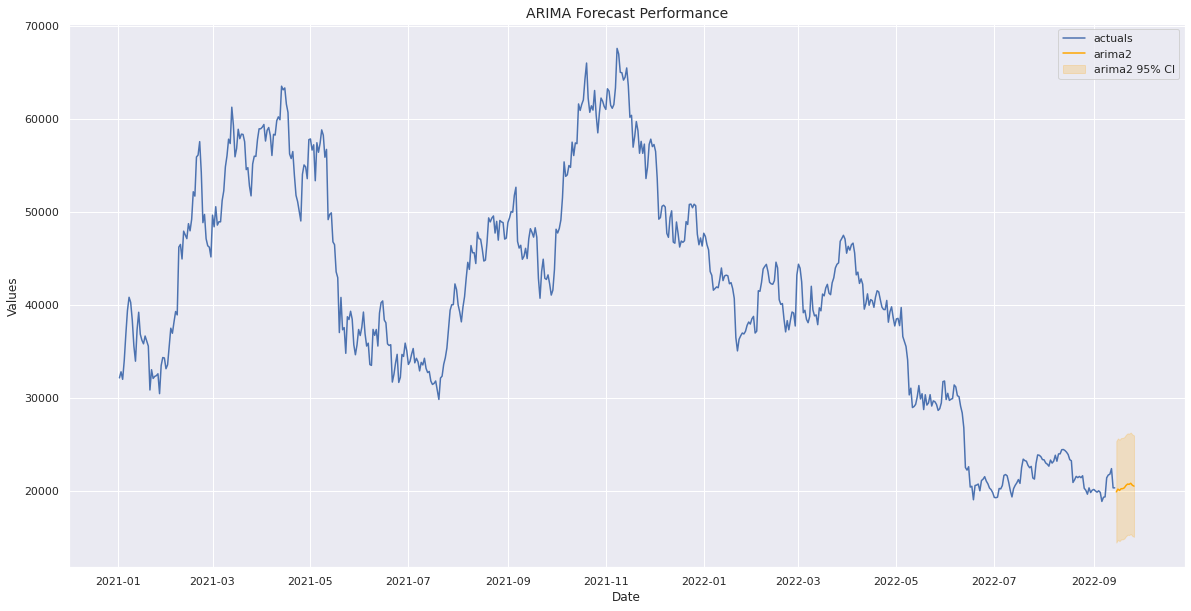

In [26]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

In [27]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  621
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5433.634
Date:                          Wed, 14 Sep 2022   AIC                          10879.268
Time:                                  16:20:15   BIC                          10905.729
Sample:                                       0   HQIC                         10889.562
                                          - 621                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      1.245      0.803      0.422      -1.441       3.441
ma.L1         -1.0000      0.962     -1.039      0.299      -2.886       0.886
ar.S.L12       0.1093      0.036      3.054      0.002       0.039       0.180
ar.S.L24       0.0713      0.026      2.774      0.006       0.021       0.122
ma.S.L12      -0.9979      0.429     -2.324      0.020      -1.839      -0.156
sigma2       3.94e+06   1.47e-06   2.69e+12      0.000    3.94e+06    3.94e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):               284.03
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.11e+27. Standard errors may be unstable.
"""

In [ ]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

In [28]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=8840.181, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8835.313, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8837.784, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8837.926, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8833.319, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=8836.057, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=8836.203, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8834.549, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8837.045, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8837.043, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=8839.037, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.020 seconds


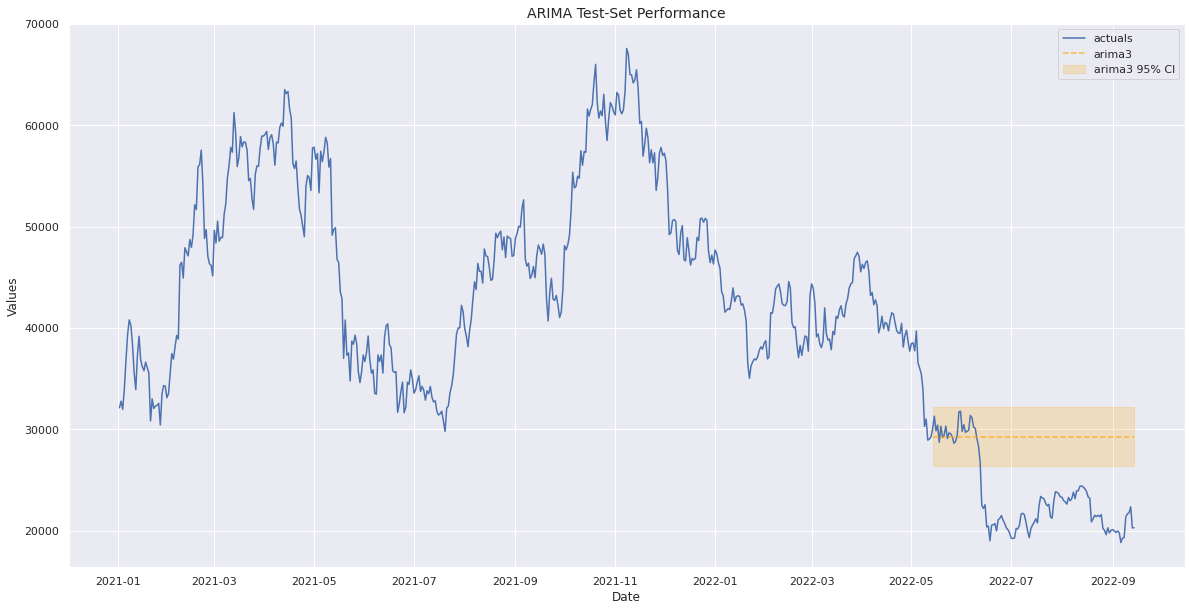

In [29]:
f.regr.summary()


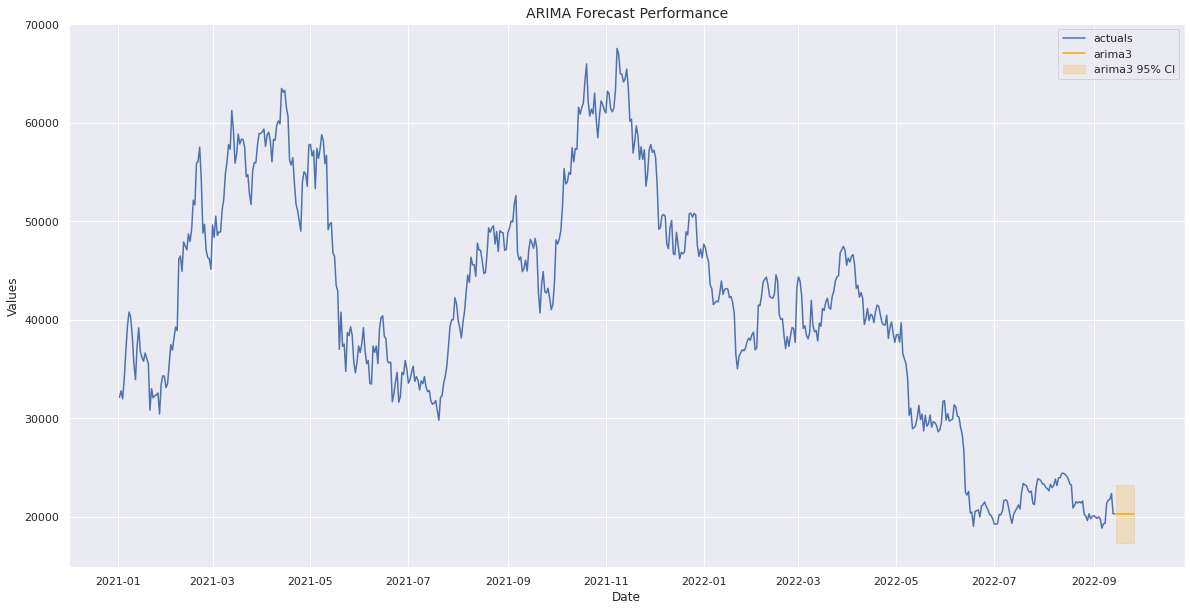

In [30]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [31]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2,
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  621
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5469.381
Date:                Wed, 14 Sep 2022   AIC                          10940.762
Time:                        16:20:40   BIC                          10945.191
Sample:                             0   HQIC                         10942.483
                                - 621                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.686e+06   1.05e+05     25.659      0.000    2.48e+06    2.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               129.41
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LSTM

In [34]:
f.regr.summary()

Forecaster(
    DateStartActuals=2021-01-02T00:00:00.000000000
    DateEndActuals=2022-09-14T00:00:00.000000000
    Freq=D
    N_actuals=621
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

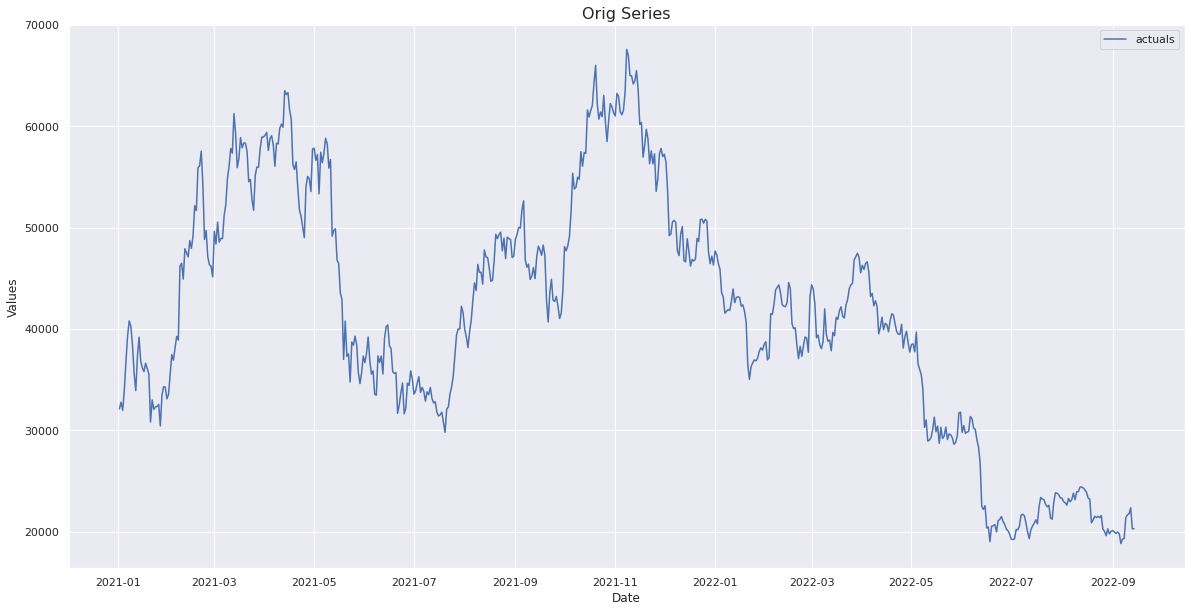

In [36]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -1.33
the p-value is 0.6171
the series is not stationary
----------------------------------------------------------------------------------------------------


### Prepare Forecast for LSTM

In [43]:
f.set_test_length(12)
f.generate_future_dates(12)

In [ ]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

In [45]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

2022-09-14 16:22:02.484261: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-14 16:22:02.484291: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-14 16:22:03.358039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-14 16:22:03.358070: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-14 16:22:03.358092: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rocketstation): /proc/driver/nvidia/version does not exist
2022-09-14 16:22:03.358267: I tensorflow/core/platform/cpu_feat

19/19 [==============================] - 1s 1ms/step - loss: 0.4501


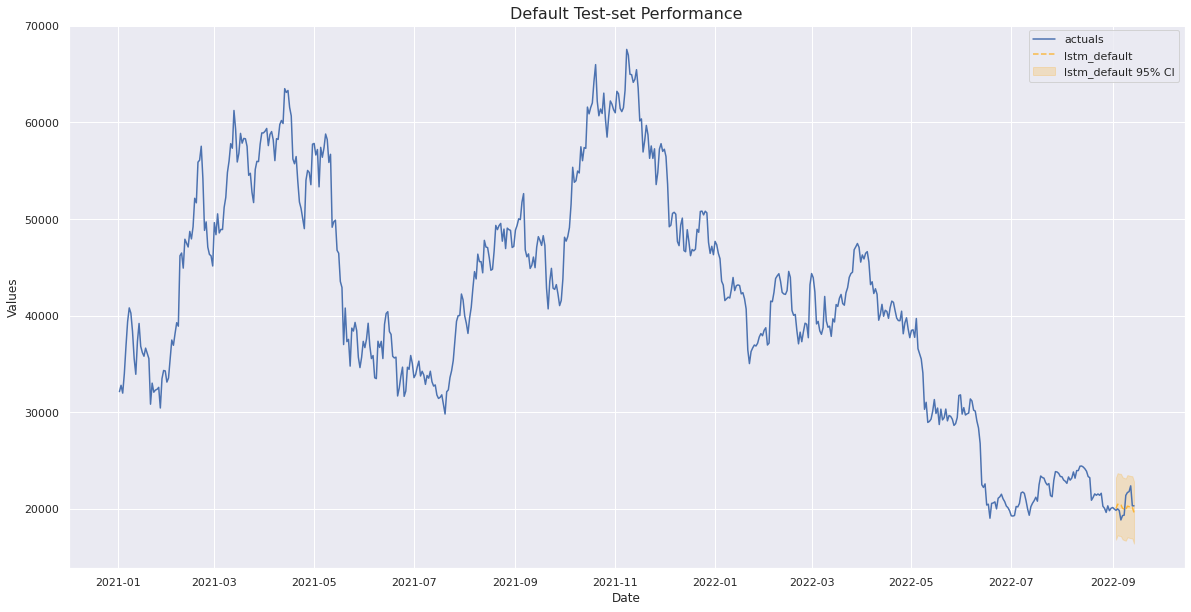

In [46]:
f.set_test_length(12)
f.generate_future_dates(12)

In [47]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

19/19 [==============================] - 1s 8ms/step - loss: 0.4495


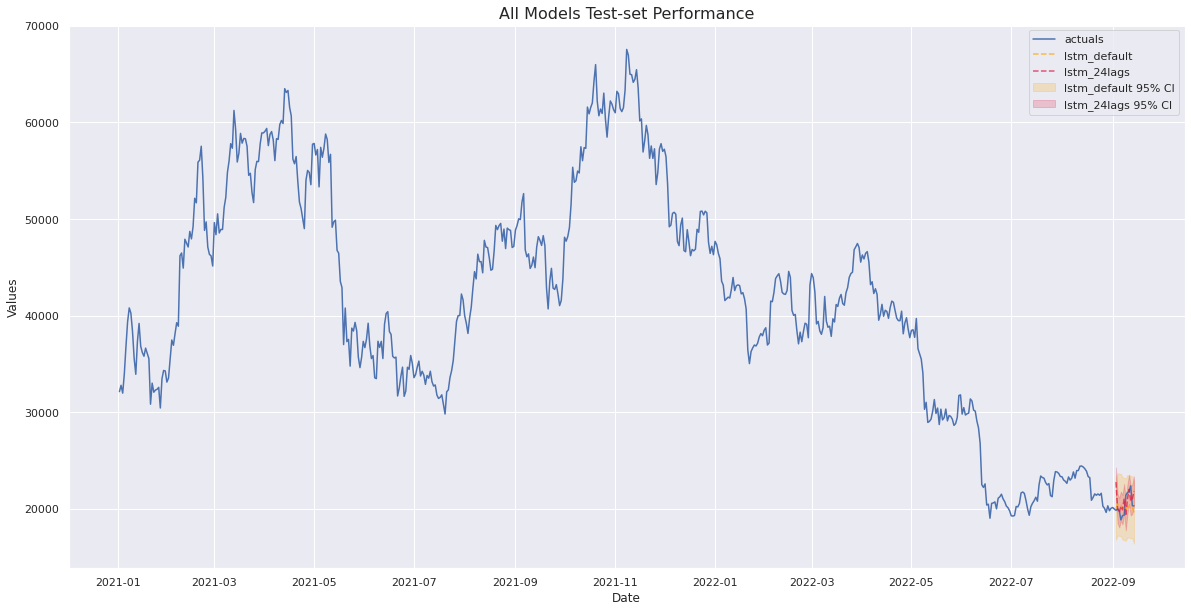

In [48]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

In [49]:
f.plot_test_set(ci=True)
plt.title('Default Test-set Performance',size=16)
plt.show()

Epoch 1/5
15/15 [==============================] - 1s 31ms/step - loss: 0.4233 - val_loss: 0.6437
Epoch 2/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3726 - val_loss: 0.5675
Epoch 3/5
15/15 [==============================] - 0s 9ms/step - loss: 0.3136 - val_loss: 0.4709
Epoch 4/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2582 - val_loss: 0.3859
Epoch 5/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2080 - val_loss: 0.3218
Epoch 1/5
15/15 [==============================] - 1s 27ms/step - loss: 0.3471 - val_loss: 0.5322
Epoch 2/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2949 - val_loss: 0.4530
Epoch 3/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2544 - val_loss: 0.3906
Epoch 4/5
15/15 [==============================] - 0s 9ms/step - loss: 0.2250 - val_loss: 0.3498
Epoch 5/5
15/15 [==============================] - 0s 9ms/step - loss: 0.1969 - val_loss: 0.3142


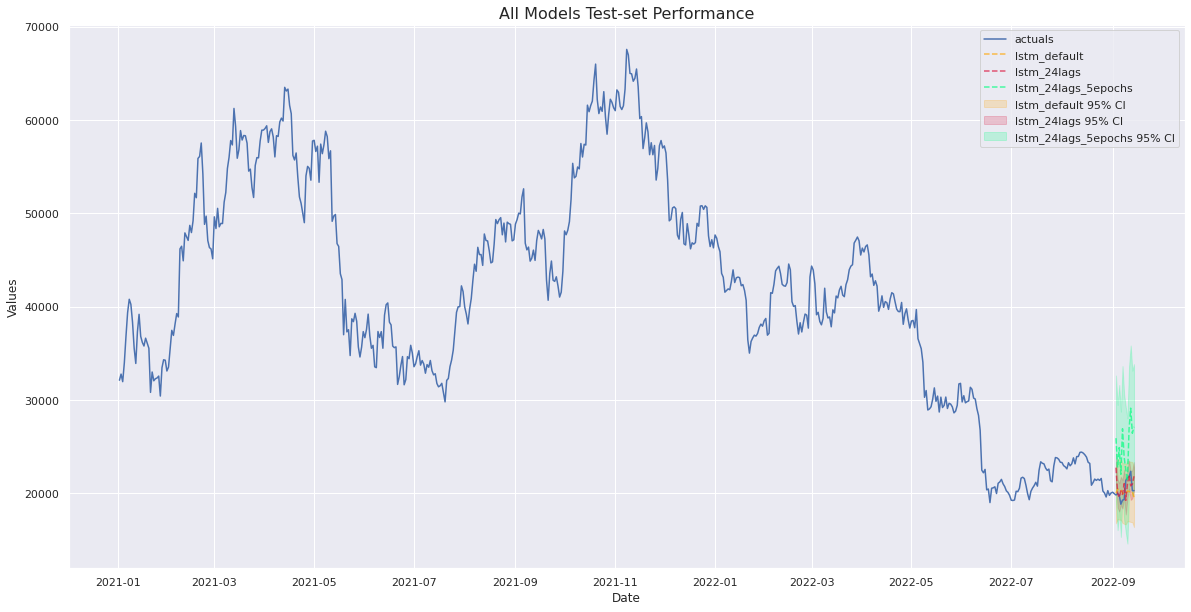

In [50]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

In [51]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

Epoch 1/25
15/15 [==============================] - 4s 100ms/step - loss: 0.3971 - val_loss: 0.5623
Epoch 2/25
15/15 [==============================] - 0s 26ms/step - loss: 0.2909 - val_loss: 0.3689
Epoch 3/25
15/15 [==============================] - 0s 26ms/step - loss: 0.1818 - val_loss: 0.2461
Epoch 4/25
15/15 [==============================] - 0s 24ms/step - loss: 0.1242 - val_loss: 0.1930
Epoch 5/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0974 - val_loss: 0.1462
Epoch 6/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0934 - val_loss: 0.1520
Epoch 7/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0910 - val_loss: 0.1435
Epoch 8/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0882 - val_loss: 0.1401
Epoch 9/25
15/15 [==============================] - 0s 23ms/step - loss: 0.0866 - val_loss: 0.1420
Epoch 10/25
15/15 [==============================] - 0s 24ms/step - loss: 0.0814 - val_loss: 0.1541
Epoch 11

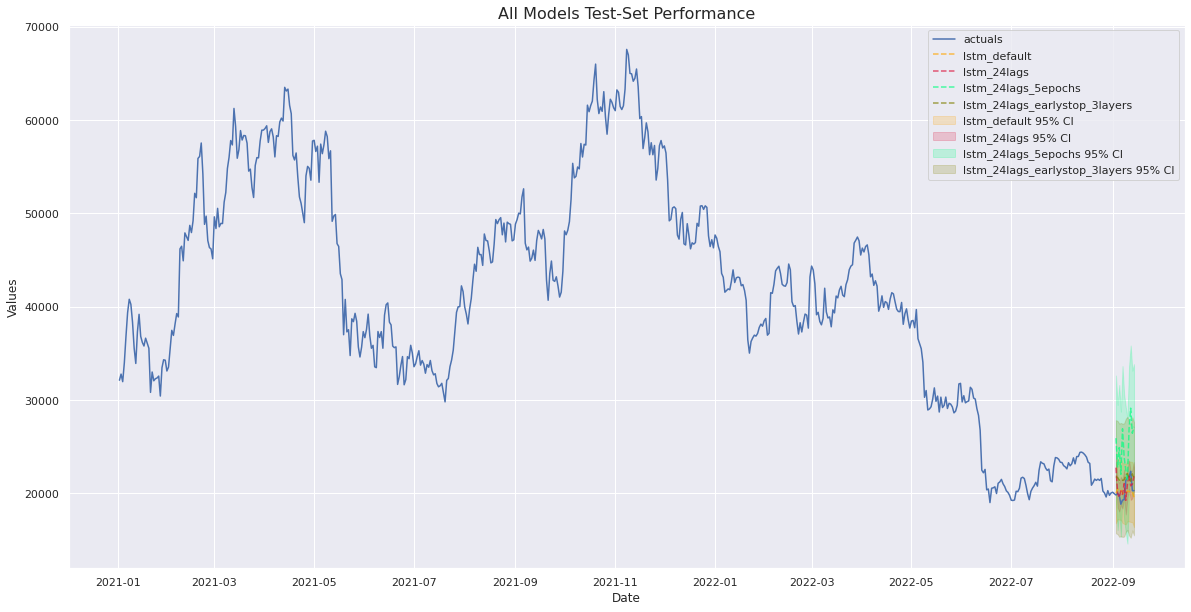

In [52]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)


In [ ]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))

In [ ]:
f.plot_test_set(ci=True)
plt.title('All Models Test-Set Performance',size=16)
plt.show()

In [ ]:
f.manual_forecast(call_me='lstm_24lags_4layers_15epochs',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)

Text(0.5, 1.0, '24 Lags 4 Layers 15 Epochs Test-Set Performance')

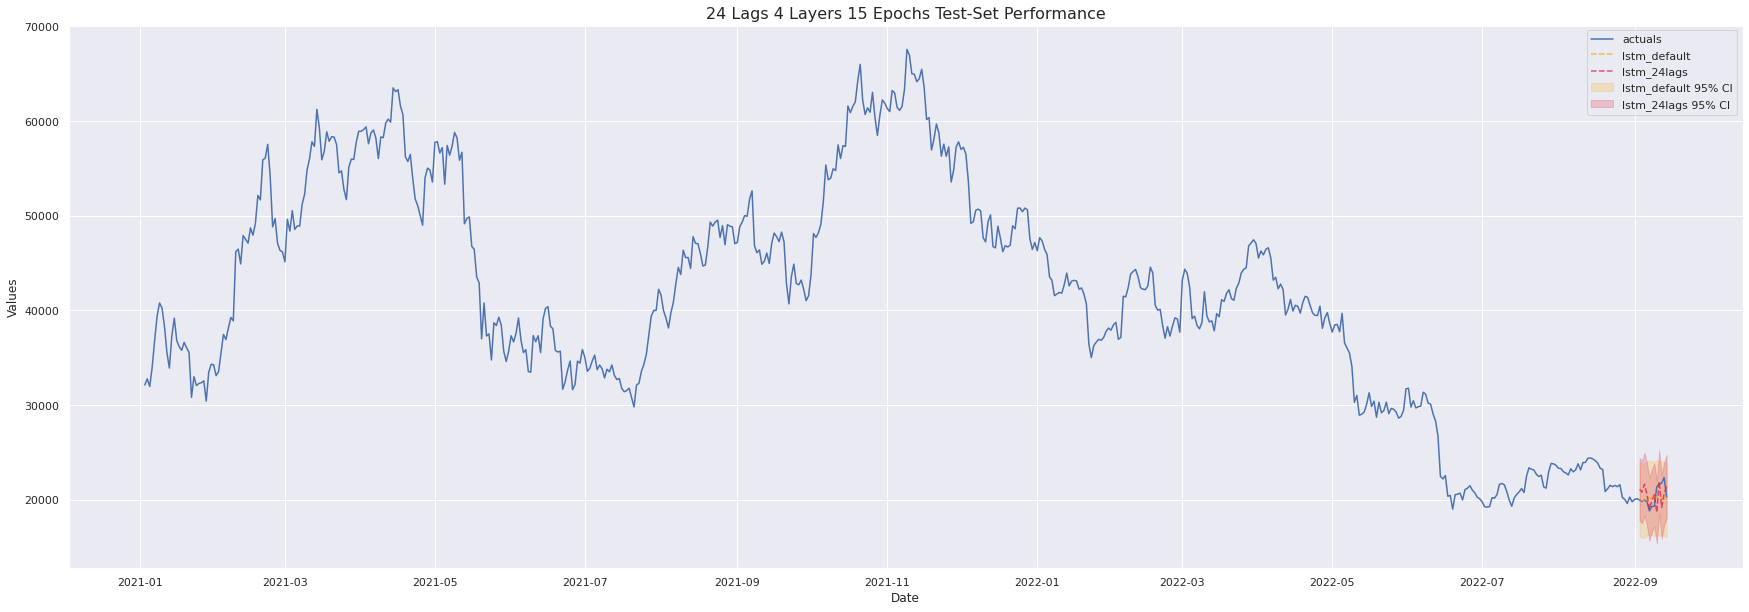

In [30]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()

In [31]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=16,
                  epochs=300,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

Epoch 1/300
28/28 [==============================] - 24s 244ms/step - loss: 0.2498 - val_loss: 0.2758
Epoch 2/300
28/28 [==============================] - 1s 49ms/step - loss: 0.1589 - val_loss: 0.2010
Epoch 3/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1537 - val_loss: 0.2012
Epoch 4/300
28/28 [==============================] - 1s 47ms/step - loss: 0.1492 - val_loss: 0.2222
Epoch 5/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1447 - val_loss: 0.2952
Epoch 6/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1415 - val_loss: 0.2387
Epoch 7/300
28/28 [==============================] - 1s 47ms/step - loss: 0.1344 - val_loss: 0.2340
Epoch 8/300
28/28 [==============================] - 1s 47ms/step - loss: 0.1354 - val_loss: 0.2444
Epoch 9/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1488 - val_loss: 0.2777
Epoch 10/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1455 - val_loss: 0.20

KeyboardInterrupt: ignored

In [ ]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()